# Тестовое задание на позицию "Аналитик данных" (SQL).

In [1]:
# Импорт библиотек
import sqlite3
sqlite3.sqlite_version

'3.39.3'

## Выгрузите фамилию и возраст, используя JOIN, из следующих таблиц.
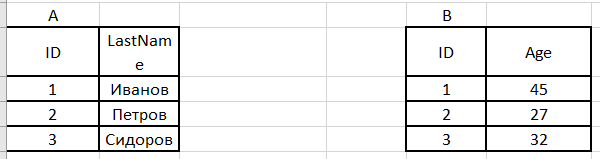

In [2]:
# Подключение к файлу базы данных с именем “db1.db”
con1 = sqlite3.connect('db1.db')

cursor = con1.cursor()

# Создаем таблицу A
cursor.execute('''
CREATE TABLE IF NOT EXISTS A (ID INTEGER PRIMARY KEY,
                              LastName TEXT NOT NULL)
''')  
# Создаем таблицу B
cursor.execute('''                              
CREATE TABLE IF NOT EXISTS B (ID INTEGER PRIMARY KEY,
                              Age INEGER NOT NULL)                              
''')
# Добавляем данные в таблицу A
cursor.execute('''
INSERT OR IGNORE INTO A (ID, LastName) 
                 VALUES (1, 'Иванов'), 
                        (2, 'Петров'), 
                        (3, 'Сидоров')
''')
# Добавляем данные в таблицу B
cursor.execute('''
INSERT OR IGNORE INTO B (ID, Age) 
                 VALUES (1, 45), 
                        (2, 27), 
                        (3, 32)
''')
# Сохраняем изменения и закрываем соединение
con1.commit()
con1.close()

In [3]:
# Устанавливаем соединение с базой данных
con1 = sqlite3.connect('db1.db')
cursor = con1.cursor()

# Выполняем запрос
cursor.execute('''SELECT LastName,
                         Age
                  FROM A
                  JOIN B USING(ID)
''')
res_1 = cursor.fetchall()

# Выводим результаты
for s in res_1:
    print(*s)
# Закрываем соединение
con1.close()

Иванов 45
Петров 27
Сидоров 32


## В получившейся таблице из задания 1, выберите самого молодого сотрудника.

In [4]:
# Устанавливаем соединение с базой данных
con2 = sqlite3.connect('db1.db')
cursor = con2.cursor()

# Выполняем запрос
cursor.execute('''SELECT LastName,
                         Age
                  FROM A
                  JOIN B USING(ID)
                  ORDER BY Age
                  LIMIT 1
''')
res_2 = cursor.fetchall()

# Выводим результаты
for s in res_2:
    print(*s)
# Закрываем соединение
con1.close()

Петров 27


## Выгрузите Название клиента и сумму платежей по клиентам, которые закрыли свои счета.
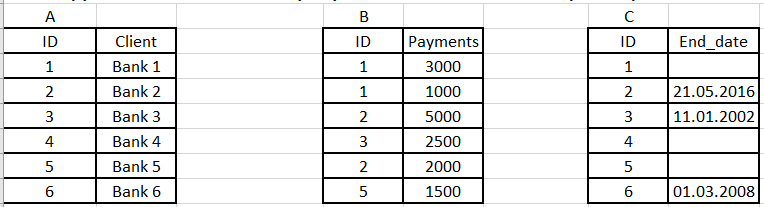

In [5]:
# Подключение к файлу базы данных с именем “db3.db”
con3 = sqlite3.connect('db3.db')

cursor = con3.cursor()

# Создаем таблицу A
cursor.execute('''
CREATE TABLE IF NOT EXISTS A (ID INTEGER PRIMARY KEY,
                              Client TEXT NOT NULL)
''')  
# Создаем таблицу B
cursor.execute('''                              
CREATE TABLE IF NOT EXISTS B (ID INTEGER,
                              Payments INEGER NOT NULL)                              
''')
# Создаем таблицу C
cursor.execute('''                              
CREATE TABLE IF NOT EXISTS C (ID INTEGER PRIMARY KEY,
                              End_date TEXT)                              
''')
# Добавляем данные в таблицу A
cursor.execute('''
INSERT OR IGNORE INTO A (ID, Client) 
                 VALUES (1, 'Bank 1'), 
                        (2, 'Bank 2'), 
                        (3, 'Bank 3'),
                        (4, 'Bank 4'),
                        (5, 'Bank 5'),
                        (6, 'Bank 6')
''')
# Добавляем данные в таблицу B
cursor.execute('''
INSERT OR IGNORE INTO B (ID, Payments) 
                 VALUES (1, 3000), 
                        (1, 1000), 
                        (2, 5000),
                        (3, 2500),
                        (2, 2000),
                        (5, 1500)
''')
# Добавляем данные в таблицу C
cursor.execute('''
INSERT OR IGNORE INTO C (ID, End_date) 
                 VALUES (1, NULL), 
                        (2, '21.05.2016'), 
                        (3, '11.01.2002'),
                        (4, NULL),
                        (5, NULL),
                        (6, '01.03.2008')
''')
# Сохраняем изменения и закрываем соединение
con3.commit()
con3.close()

In [6]:
# Устанавливаем соединение с базой данных
con3 = sqlite3.connect('db3.db')
cursor = con3.cursor()

# Выполняем запрос
cursor.execute('''SELECT Client,
                         COALESCE(SUM(Payments), 0) AS Sum_payments
                  FROM A
                  LEFT JOIN B USING(ID)
                  WHERE ID IN (SELECT ID FROM C WHERE End_date IS NOT NULL)
                  GROUP BY Client
                  ORDER BY Client

''')
res_3 = cursor.fetchall()

# Выводим результаты
for s in res_3:
    print(*s)
# Закрываем соединение
con3.close()

Bank 2 35000
Bank 3 12500
Bank 6 0


## Выгрузите название клиента и сумму всех платежей для каждого клиента (данные теже что и в задании 3).
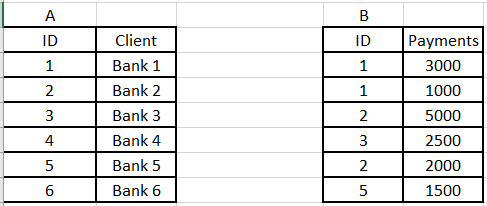

In [7]:
# Устанавливаем соединение с базой данных
con4 = sqlite3.connect('db3.db')
cursor = con4.cursor()

# Выполняем запрос
cursor.execute('''SELECT DISTINCT Client,
                         COALESCE(SUM(Payments) OVER(PARTITION BY Client), 0) AS Sum_payments
                  FROM A
                  LEFT JOIN B USING(ID)
                  ORDER BY Client

''')
res_4 = cursor.fetchall()

# Выводим результаты
for s in res_4:
    print(*s)
# Закрываем соединение
con4.close()

Bank 1 20000
Bank 2 35000
Bank 3 12500
Bank 4 0
Bank 5 7500
Bank 6 0


 ## Нарисуйте для каждого из запросов получившуюся таблицу в результате выполнения этих запросов.
 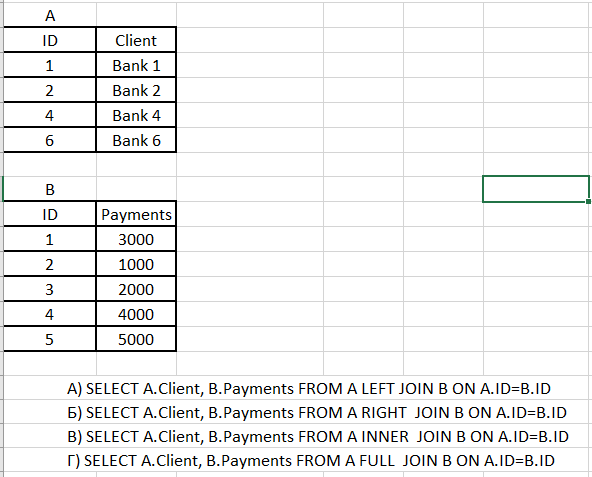

In [8]:
# Подключение к файлу базы данных с именем “db5.db”
con5 = sqlite3.connect('db5.db')

cursor = con5.cursor()

# Создаем таблицу A
cursor.execute('''
CREATE TABLE IF NOT EXISTS A (ID INTEGER PRIMARY KEY,
                              Client TEXT NOT NULL)
''')  
# Создаем таблицу B
cursor.execute('''                              
CREATE TABLE IF NOT EXISTS B (ID INTEGER,
                              Payments INEGER NOT NULL)                              
''')

# Добавляем данные в таблицу A
cursor.execute('''
INSERT OR IGNORE INTO A (ID, Client) 
                 VALUES (1, 'Bank 1'), 
                        (2, 'Bank 2'), 
                        (4, 'Bank 4'),
                        (6, 'Bank 6')
''')
# Добавляем данные в таблицу B
cursor.execute('''
INSERT OR IGNORE INTO B (ID, Payments) 
                 VALUES (1, 3000), 
                        (2, 1000), 
                        (3, 2000),
                        (4, 4000),
                        (5, 5000)
''')
# Сохраняем изменения и закрываем соединение
con5.commit()
con5.close()

In [9]:
# Устанавливаем соединение с базой данных
con5 = sqlite3.connect('db5.db')
cursor = con5.cursor()

# Выполняем запрос А
cursor.execute('''SELECT A.Client,
                         B.Payments
                  FROM A
                  LEFT JOIN B ON A.ID = B.ID
''')
res_51 = cursor.fetchall()

# Выводим результаты
print('Запрос А')
print('------------')
for s in res_51:
    print(*s)
print('************')

# Выполняем запрос Б
cursor.execute('''SELECT A.Client,
                         B.Payments
                  FROM A
                  RIGHT JOIN B ON A.ID = B.ID
''')
res_52 = cursor.fetchall()
# Выводим результаты
print('Запрос Б')
print('------------')
for s in res_52:
    print(*s)
print('************')

# Выполняем запрос В
cursor.execute('''SELECT A.Client,
                         B.Payments
                  FROM A
                  INNER JOIN B ON A.ID = B.ID
''')
res_53 = cursor.fetchall()
# Выводим результаты
print('Запрос В')
print('------------')
for s in res_53:
    print(*s)
print('************')

# Выполняем запрос Г
cursor.execute('''SELECT A.Client,
                         B.Payments
                  FROM A
                  FULL JOIN B ON A.ID = B.ID
''')
res_54 = cursor.fetchall()
# Выводим результаты
print('Запрос Г')
print('------------')
for s in res_54:
    print(*s)
print('************')



# Закрываем соединение
con5.close()

Запрос А
------------
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 6 None
************
Запрос Б
------------
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 4 4000
None 2000
None 5000
None 2000
None 5000
None 2000
None 5000
None 2000
None 5000
None 2000
None 5000
************
Запрос В
------------
Bank 1 3000
Bank 2 1000
Bank 4 4000
Bank 1 3000
Bank 2 1000
Bank 4 4000
Bank 1 3000
Bank 2 1000
Bank 4 4000
Bank 1 3000
Bank 2 1000
Bank 4 4000
Bank 1 3000
Bank 2 1000
Bank 4 4000
************
Запрос Г
------------
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 1 3000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 2 1000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 4 4000
Bank 6 None
None 2000
None 5000
None 2000

## Выгрузите сумму платежей по клиентам, где назначение платежа начинается со слова «договор».
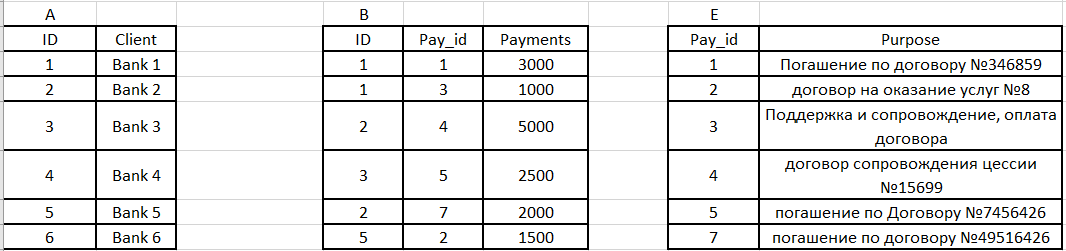

In [10]:
# Подключение к файлу базы данных с именем “db3.db”
con6 = sqlite3.connect('db6.db')

cursor = con6.cursor()

# Создаем таблицу A
cursor.execute('''
CREATE TABLE IF NOT EXISTS A (ID INTEGER PRIMARY KEY,
                              Client TEXT NOT NULL)
''')  
# Создаем таблицу B
cursor.execute('''                              
CREATE TABLE IF NOT EXISTS B (ID INTEGER,
                              Pay_id INTEGER,
                              Payments INEGER NOT NULL)                              
''')
# Создаем таблицу E
cursor.execute('''                              
CREATE TABLE IF NOT EXISTS E (Pay_id INTEGER PRIMARY KEY,
                              Purpose TEXT)                              
''')
# Добавляем данные в таблицу A
cursor.execute('''
INSERT OR IGNORE INTO A (ID, Client) 
                 VALUES (1, 'Bank 1'), 
                        (2, 'Bank 2'), 
                        (3, 'Bank 3'),
                        (4, 'Bank 4'),
                        (5, 'Bank 5'),
                        (6, 'Bank 6')
''')
# Добавляем данные в таблицу B
cursor.execute('''
INSERT OR IGNORE INTO B (ID, Pay_id, Payments) 
                 VALUES (1, 1, 3000), 
                        (1, 3, 1000), 
                        (2, 4, 5000),
                        (3, 5, 2500),
                        (2, 7, 2000),
                        (5, 2, 1500)
''')
# Добавляем данные в таблицу C
cursor.execute('''
INSERT OR IGNORE INTO E (Pay_id, Purpose) 
                 VALUES (1, 'Погашение по договору №346859'), 
                        (2, 'договор на оказание услуг №8'), 
                        (3, 'Поддержка и сопровождение, оплата договора'),
                        (4, 'договор сопровождения цессии №15699'),
                        (5, 'погашение по Договору №7456426'),
                        (7, 'погашение по Договору №7456426')
''')
# Сохраняем изменения и закрываем соединение
con6.commit()
con6.close()

In [11]:
# Устанавливаем соединение с базой данных
con6 = sqlite3.connect('db6.db')
cursor = con6.cursor()

# Выполняем запрос
cursor.execute('''SELECT A.Client,
                  SUM(Payments) AS Sum_payments
                  FROM A
                  LEFT JOIN B USING(ID)
                  WHERE Pay_id IN(SELECT Pay_id
                                         FROM E
                                         WHERE Purpose LIKE 'договор%')
                  GROUP BY A.Client
                  

''')
res_6 = cursor.fetchall()

# Выводим результаты
for s in res_6:
    print(*s)
# Закрываем соединение
con6.close()

Bank 2 25000
Bank 5 7500


## Найдите заблокированные номера телефонов (BLOCK_FLG = 'Y'), по которым была активность «Должник лично» более 3х раз.
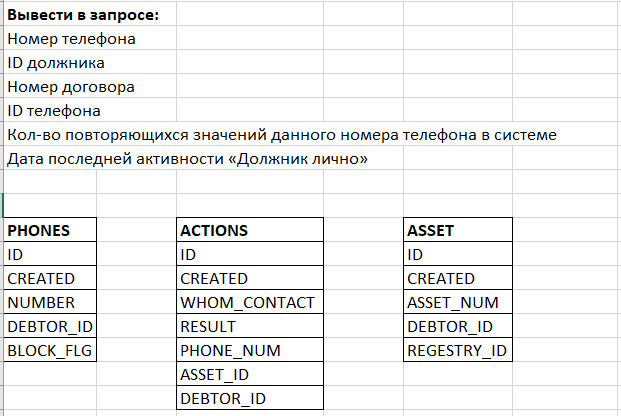


**Решение.**   
Предположим что данным названиям соответствуют соответствующие столбцы из БД:  
Номер телефона - `PHONES.NUMBER`, `ACTIONS.PHONE_NUM`  
ID должника - `PHONES.DEBTOR_ID`, `ACTIONS.DEBTOR_ID`, `ASSET.DEBTOR_ID`  
Номер договора - `ASSET.ASSET_NUM`  
ID телефона - `PHONES.ID`  
Кол-во повторяющихся значений данного номера телефона в системе - будем считать `ACTIONS.PHONE_NUM`  
Дата последней активности «Должник лично» - `ACTIONS.CREATED` (`WHERE ACTIONS.RESULT = 'Должник лично'`)  

Будем считать , что в таблице `ASSET` информация о договорах (они уникальны и **без повторений**).  
Предположим, что в таблице `PHONES` содержится информация по состоянию номеров телефонов (заблокирован или нет).  
В таблице `ACTIONS` информация по всем событиям связанным с работой компании (вероятно в части работы с должниками).  
Также скорее всего номер телефона может переходить от клиента к клиенту, поэтому одному номеру телефона (`PHONES.NUMBER`) может соответствовать несколько договоров (`ASSET_NUM`).    
Кроме этого предположим, что у одного и того же номера могут быть разные `ID` из-за состояния номера: заблокировани или нет на данный момент времени `PHONES.CREATED`.   

**Примечание:** Хотя возможно что в таблице `PHONES` просто перезаписываются данные в зависимости от того заблокирован номер или нет.   
В таком случае `ID` и `NUMBER` в таблице `PHONES` уникальные.   

In [ ]:
SELECT PHONE.NUMBER AS PHONE_NUM,
       ACTIONS.DEBTOR_ID AS DEBTOR_ID,
       ASSET.ASSET_NUM AS ASSET_NUM,
       PHONES.ID AS PHONE_ID,
       COUNT(ACTIONS.ID) OVER(PARTITION BY ACTIONS.PHONE_NUM) AS PHONE_NUM_REPEAT,
       MAX(DATE(ACTIONS.CREATED)) FILTER(WHERE ACTIONS.RESULT = 'Должник лично') OVER(PARTITION BY ACTIONS.PHONE_NUM) AS DATE_AC
    
FROM ACTIONS
LEFT JOIN ASSET ON ACTIONS.ASSET_ID=ASSET.ID
LEFT JOIN PHONE NUMBER ON ACTIONS.PHONE_NUM=PHONE.NUMBER
WHERE PHONE.BLOCK_FLG='Y' AND ACTIONS.PHONE_NUM IN (SELECT PHONE_NUM
                                                    FROM ACTIONS
                                                    WHERE RESULT = 'Должник лично'
                                                    GROUP BY PHONE_NUM
                                                    HAVING COUNT(ID) > 3)

**Описание запроса:**   
Сначала происходит объединение таблиц в одну: к таблице ACTIONS добавляются данные из таблиц `ASSET` и `PHONE` (также можно их оъединить используя поле `DEBTOR_ID`). Для этого использовали `LEFT JOIN` чтобы не потерять данные.    
Далее мы фильтруем данные по заданным условиям в блоке `WHERE` (для второго условия используем подзапрос).     
После этого выводим необходимые колонки. Для двух последних показателей используем оконные функции.   